**Question 8.** Given a chemical reaction as follow:

$$
E+S\underset{k_2}{\stackrel{k_1}{\rightleftharpoons}}ES{\stackrel{k_3}{\rightarrow}E+P}
$$

# Question 8.1

Terri A. Grosso gave a [nice talk](http://www.lehman.edu/academics/cmacs/documents/2MathBio.pdf) about this model, namely the Michaelis-Menten Model of enzyme kinetics. Therefore, for the first reaction, which is a reversible reaction, $r_{net}=r_{forward}+r_{reverse}$ applies to all species. Therefore, according to the law of mass action:

$$
\begin{cases}
r_{ES}=k_1[E][S]-k_2[ES]-k_3[ES]\\
r_{E}=k_3[ES]+k_2[ES]-k_1[E][S]\\
r_{S}=-k_1[E][S]+k_2[ES]\\
r_{P}=k_3[ES]
\end{cases}
$$

Upon simplification, we get: 

$$
\begin{cases}
r_{ES}=k_1[E][S]-(k_2+k_3)[ES]\\
r_{E}=-k_1[E][S]+(k_2+k_3)[ES]\\
r_{S}=-k_1[E][S]+k_2[ES]\\
r_{P}=k_3[ES]
\end{cases}
$$

# Question 8.2

Let $m=[ES],e=[E],s=[S],p=[P]$, and then we get

$$
\begin{cases}
f(m)=100es-750m\\
g(e)=-100es+750m\\
h(s)=-100es+600m\\
l(p)=150m
\end{cases}
$$

given conditions that:
$$
\begin{cases}
e_{0}=1 \\
s_{0}=10  \\ 
m_{0}=p_{0}=0 
\end{cases}
$$


Using the enzyme conservation law, we know that $[ES] = [E]_0 - [{E}]=1 µM- [{E}]$ and $[P]=[S]_0-[ES]-[S]$. Therefore, the key functions needed to be solved can be written as:
Upon simplification, we get:

$$
\begin{cases}
\frac{de}{dt}=-100es-750e+750\\
\frac{ds}{dt}=-100es-600e+600\\
\end{cases}
$$

given conditions that:
$$
\begin{cases}
e_{0}=1 \\
s_{0}=10 \\ 
\end{cases}
$$

Therefore, it is essentially a 2D model. 

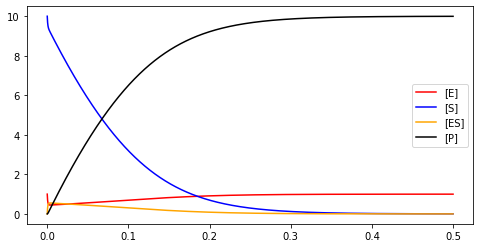

In [1]:
# This solution is offered in Numerical Python but it doesn't use RK4， and uses the LSODA algorithm.
# use Python3 kernel

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
    
# initial steps
# Just simplify this a bit. Upon simplification, it is a 2D model
def f(es, t):
    e, s = es
    return [-100 * e * s - 750 * e + 750, -100 * e * s -600 * e + 600]
es0=[1,10]
t = np.linspace (0, 0.5, 100000)
es_t = integrate.odeint(f, es0, t)
es_t.shape

fig, axes = plt.subplots(figsize=(8, 4))
axes.plot(t, es_t[:,0], 'r', label="[E]")
axes.plot(t, es_t[:,1], 'b', label="[S]")
axes.plot(t, 1-es_t[:,0], 'orange', label="[ES]")
axes.plot(t, 9+es_t[:,0]-es_t[:,1], 'black', label="[P]")
axes.legend()

It is expected that [ES] rise fast at the beginning and then fall.

# Solution using RK4

In [1]:
# install.packages("deSolve")
library(deSolve)
# help(rk4)
# help(ode.2D)

The ``deSolve`` package is described in:
> Soetaert K E R, Petzoldt T, Setzer R W. [Solving Differential Equations in R: Package deSolve[J]](https://pure.knaw.nl/ws/portalfiles/portal/462308/Soetaert_ea_4748.pdf). *Journal of Statistical Software*, 2010, 33(9).

It gives a similar example (shown below) as our case.

In [12]:
LVmod0D <- function(Time, State, Pars) {
    with(as.list(c(State, Pars)), { 
        IngestC <- rI * P * C
        GrowthP <- rG * P * (1 - P/K)
        MortC <- rM * C
        
        dP <- GrowthP - IngestC
        dC <- IngestC * AE - MortC
        
        return(list(c(dP, dC)))
    })
}

Therefore, in our case:
$$
\begin{cases}
r_{ES}=k_1[E][S]-(k_2+k_3)[ES]\\
r_{E}=-k_1[E][S]+(k_2+k_3)[ES]\\
r_{S}=-k_1[E][S]+k_2[ES]\\
r_{P}=k_3[ES]
\end{cases}
$$

Given indice that: 

$$
\begin{cases}
k_{1}=100\\
k_{2}=600\\
k_{3}=150\\
\end{cases}
$$

With the initial state at:

$$
\begin{cases}
[E]_{0}=1 \\
[S]_{0}=10  \\ 
[ES]_{0}=[P]_{0}=0 \\
\end{cases}
$$

and 

$$
\begin{cases}
[ES] = [E]_0 - [{E}]\\
[P]=[S]_0-[ES]-[S]\\
\end{cases}
$$


The above function can be simplified (shown below) but we will try to run with more variables, so please ignore this.

In [26]:
MMModel_simp <- function(Time, State, Pars) {
    with(as.list(c(State, Pars)), { 
        # there should've been a list of k* if not simplified
        de <- -100 * e * s - 750 * e + 750
        ds <- -100 * e * s -600 * e + 600
        return(list(c(de, ds)))
    })
}

In [33]:
yini2 <- c(e = 1, s = 10)
times2 <- seq(0, 100, by = 0.01)
# Giving our parameters
pars <- c(k1 = 100, k2 = 600, k3 =  150)

In [34]:
print(system.time(
    out2 <- ode(func = MMModel_simp, y = yini2, parms = pars, times = times2, method="rk4")))

   user  system elapsed 
  0.204   0.001   0.205 


In [36]:
head(out2, n = 5) 

time,e,s
0.00,1.000000e+00,1.000000e+01
0.01,-2.507893e+05,-2.510826e+05
0.02,-1.005607e+82,-1.005607e+82
0.03,NaN,NaN
0.04,NaN,NaN


Not working...